In [6]:
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:

def Bloom_Filter(inp_filename, op_filename, k, n):
    lookup_count = 0  # will store the count of the number of lookups
    FP_count = 0  # will store the count of the number of False Positives

    # Create the bit array with the required size and fill them initially with 0.
    bit_arr_size = round(-(n * np.log(0.8)) / (np.square(np.log(2))))
    bloom_fltr = [0] * bit_arr_size

    # Function to generate hash functions
    def filters_to_have():
        lst_fltr = []
        for i in range(k):
            lst_fltr.append(char_val_sum % (bit_arr_size + i))
        return lst_fltr

    with open(inp_filename, 'r') as file:
        my_reader = csv.reader(file, delimiter=',')
        next(file)
        for row in my_reader:
            word = row[0]
            char_val_sum = sum([ord(z) for z in list(word)])
            lst_fltr = filters_to_have()
            lst_fltr = [len(bloom_fltr) - 1 if i > len(bloom_fltr) - 1 else i for i in lst_fltr]

            sum_all = sum([bloom_fltr[i] == 0 for i in lst_fltr])
            if sum_all > 0:
                with open(op_filename, 'a', newline='') as csvfile:
                    spamwriter1 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
                    spamwriter1.writerow([word])
                for ij in lst_fltr:
                    bloom_fltr[ij] = 1
            else:
                lookup_count += 1
                cc = 0
                with open(op_filename, 'r') as file:
                    my_reader = csv.reader(file, delimiter=',')
                    next(file)
                    for row1 in my_reader:
                        word1 = row1[0]
                        if word == word1:
                            cc += 1
                if cc > 0:
                    pass
                else:
                    FP_count += 1
                    with open(op_filename, 'a', newline='') as csvfile:
                        spamwriter3 = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
                        spamwriter3.writerow([word])
    print('Number of False Positives: ', FP_count)
    print('Number of Lookup Count: ', lookup_count)
    return [lookup_count, FP_count]

In [8]:
def clear_file(file_path):
    with open(file_path, 'w', newline=''):
        pass  # This creates an empty file

In [9]:
# Experiment with different values of k and n
def experiment_k_n(target_false_positive_rate,max_k,max_n):
    k_values = []
    n_values = []
    false_positive_rates = []
    best_k=1
    best_n=1
    ans = 1
    for k in range(1, max_k):
        for n in range(1000, max_n, 1000):
                        
            output_file = 'word_drop.csv'
            clear_file(output_file)
            lookup_count, FP_count = Bloom_Filter('stream.csv', output_file, k, n)
            false_positive_rate = FP_count / (FP_count + lookup_count)
            if false_positive_rate <= target_false_positive_rate:
                print(f"Target False Positive Rate ({target_false_positive_rate}):")
                print(f"Optimal k: {k}")
                print(f"Optimal n: {n}")
            if(false_positive_rate<ans):
                ans=false_positive_rate
                best_k=k
                best_n=n
            k_values.append(k)
            n_values.append(n)
            false_positive_rates.append(false_positive_rate)
    print("The best values are k = ",k," and n = ",n," and FPR = ",ans)
    return k_values, n_values, false_positive_rates


In [10]:

# Generate plots
def generate_plots(k_values, n_values, false_positive_rates):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(k_values, false_positive_rates, marker='o')
    plt.title('False Positive Rate vs. k')
    plt.xlabel('k (Number of Hash Functions)')
    plt.ylabel('False Positive Rate')

    plt.subplot(1, 2, 2)
    plt.scatter(n_values, false_positive_rates, marker='o')
    plt.title('False Positive Rate vs. n')
    plt.xlabel('n (Expected Number of Elements)')
    plt.ylabel('False Positive Rate')

    plt.tight_layout()
    plt.show()


In [11]:
# Call the experiment function
k_values, n_values, false_positive_rates = experiment_k_n(0.8,5,10000)


Number of False Positives:  8437
Number of Lookup Count:  9535
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 1000
Number of False Positives:  8053
Number of Lookup Count:  9151
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 2000
Number of False Positives:  7928
Number of Lookup Count:  9026
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 3000
Number of False Positives:  7903
Number of Lookup Count:  9001
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 4000
Number of False Positives:  7903
Number of Lookup Count:  9001
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 5000
Number of False Positives:  7903
Number of Lookup Count:  9001
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 6000
Number of False Positives:  7903
Number of Lookup Count:  9001
Target False Positive Rate (0.8):
Optimal k: 1
Optimal n: 7000
Number of False Positives:  7903
Number of Lookup Count:  9001
Target False Positive Rate (0.8):
Optimal k: 1
Optimal 

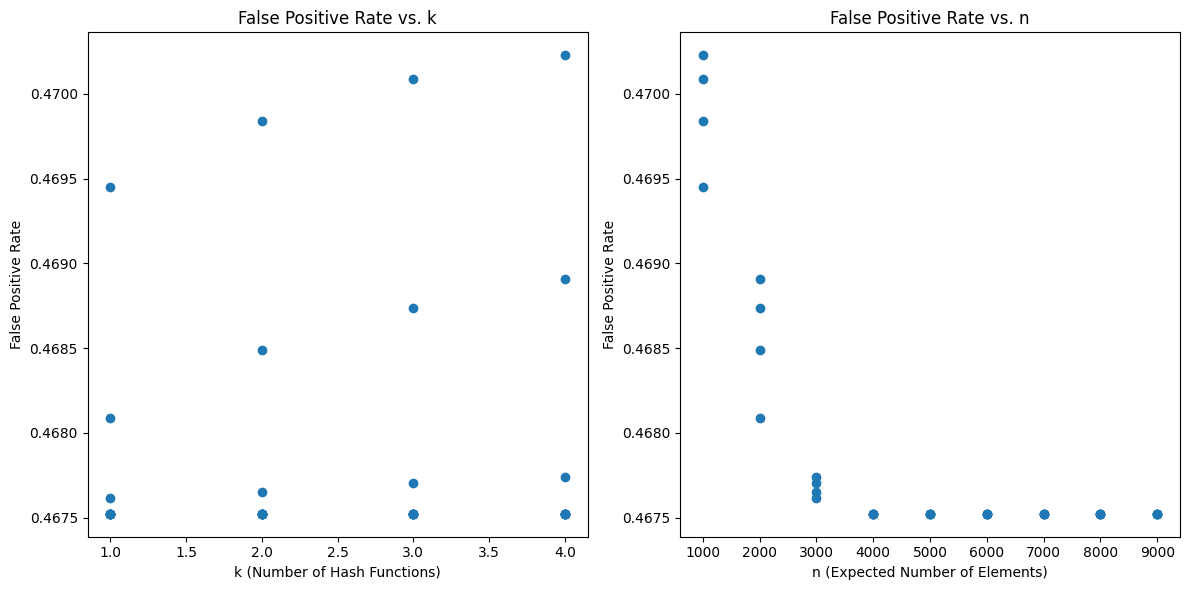

In [13]:
generate_plots(k_values, n_values, false_positive_rates)